### seaborn

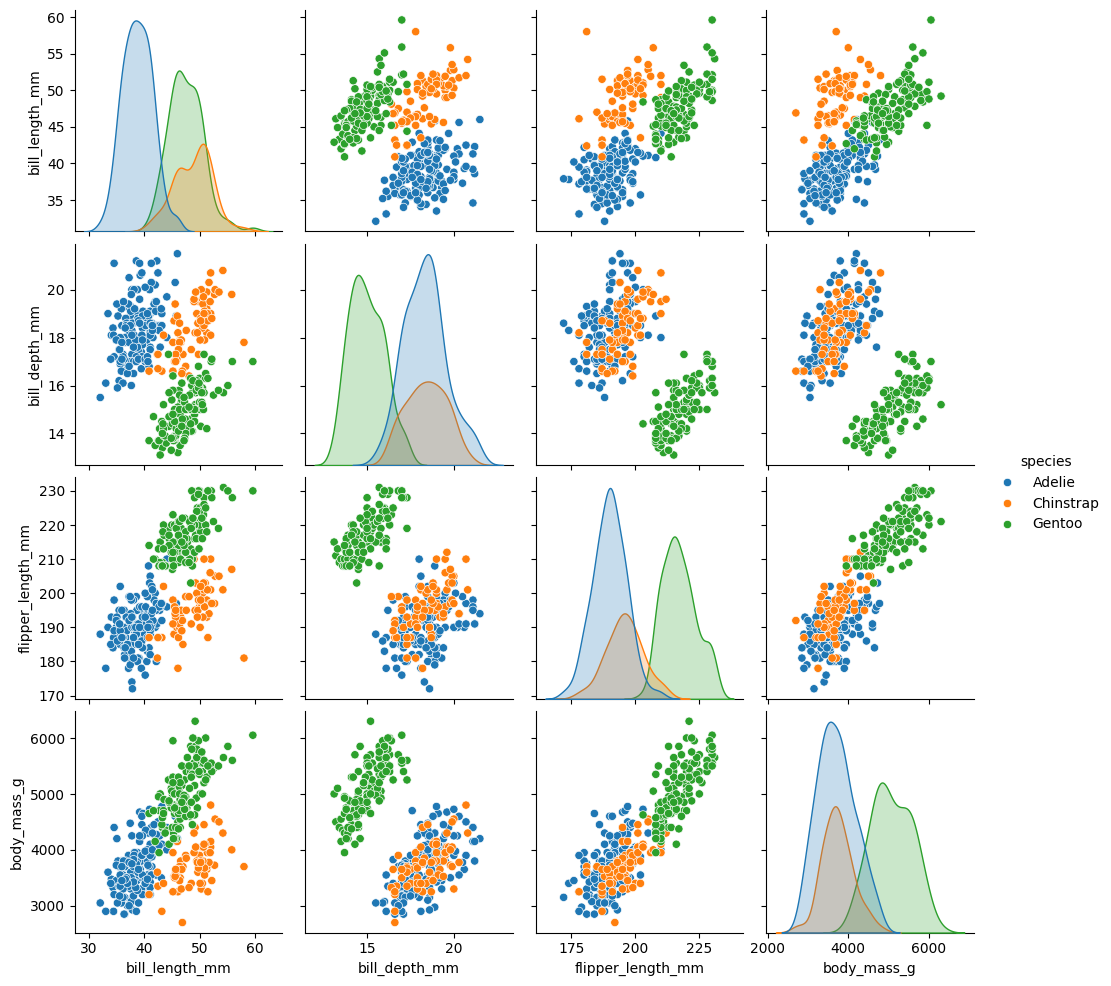

In [1]:
import seaborn as sns
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")


### plotly

In [2]:
import plotly.express as px

df = px.data.stocks()
fig = px.line(df, x='date', y='GOOG')
fig.show()


In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

# read in volcano database data
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/volcano_db.csv",
    encoding="iso-8859-1",
)

# frequency of Country
freq = df['Country'].value_counts().reset_index()
freq.columns = ['x', 'Country']

# read in 3d volcano surface data
df_v = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.4, 0.6],
    specs=[[{"type": "scattergeo", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "surface"}]])

# Add scattergeo globe map of volcano locations
fig.add_trace(
    go.Scattergeo(lat=df["Latitude"],
                  lon=df["Longitude"],
                  mode="markers",
                  hoverinfo="text",
                  showlegend=False,
                  marker=dict(color="crimson", size=4, opacity=0.8)),
    row=1, col=1
)

# Add locations bar chart
fig.add_trace(
    go.Bar(x=freq["x"][0:10],y=freq["Country"][0:10], marker=dict(color="crimson"), showlegend=False),
    row=1, col=2
)

# Add 3d surface of volcano
fig.add_trace(
    go.Surface(z=df_v.values.tolist(), showscale=False),
    row=2, col=2
)

# Update geo subplot properties
fig.update_geos(
    projection_type="orthographic",
    landcolor="white",
    oceancolor="MidnightBlue",
    showocean=True,
    lakecolor="LightBlue"
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Set theme, margin, and annotation in layout
fig.update_layout(
    template="plotly_dark",
    margin=dict(r=10, t=25, b=40, l=60),
    annotations=[
        dict(
            text="Source: NOAA",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0)
    ]
)

fig.show()

In [6]:
import plotly.express as px

df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", color="continent",animation_group="country",
                 size="pop", hover_name="country", log_x=True,
                 animation_frame="year", range_x=[100, 100000],
                 range_y=[25, 90])

display(fig)

## Plots

In [5]:
import pandas as pd

df = pd.read_csv("C:\\Users\\ikuto\\Documents\\Research_code\\MacroModeling\\data\\regionalDSGE\\DataA.csv")
df.head()

,DATE,NE GDP Def,S GDP Def,MW GDP Def,W GDP Def,NE Real GDP,S Real GDP,MW Real GDP,W Real GDP,National Real GDP,...,NE Inv,S Inv,MW Inv,W Inv,National Investment,NE CNP,S CNP,MW CNP,W CNP,National CNP
0,1997-01-01,73.560754,70.762918,72.937566,75.785615,2544182.6,3905464.3,2665010.8,2549398.6,11521.938,...,467295.2,556358.0,455435.8,418810.2,1595.601,40535291.92,72395066.42,47779622.33,44669636.67,205379617.3
1,1998-01-01,74.838753,71.650907,74.258769,76.244758,2608375.1,4098305.0,2753891.2,2706248.6,12038.283,...,467389.2,599149.4,478038.1,452638.0,1736.671,41009987.92,74557701.17,48394511.17,46363819.92,210326020.2
2,1999-01-01,75.875119,73.000836,75.531486,77.136722,2718837.4,4275021.6,2848515.9,2891071.5,12610.491,...,486314.2,627191.4,486707.9,502447.4,1887.059,41228436.08,75525710.83,48704645.33,47133588.67,212592380.9
3,2000-01-01,77.222520,75.293162,76.982939,78.576128,2847666.7,4391075.8,2944586.2,3072665.9,13130.987,...,511201.6,626408.7,488395.1,544709.7,2038.408,41499539.42,76574250.50,49055393.17,47980140.83,215109323.9
4,2001-01-01,79.033258,77.322047,79.038667,80.118181,2892741.8,4474499.5,2922402.9,3070099.3,13262.079,...,518832.0,651902.8,458431.6,497845.3,1934.842,41775965.58,77639043.75,49387315.25,48772846.33,217575170.9


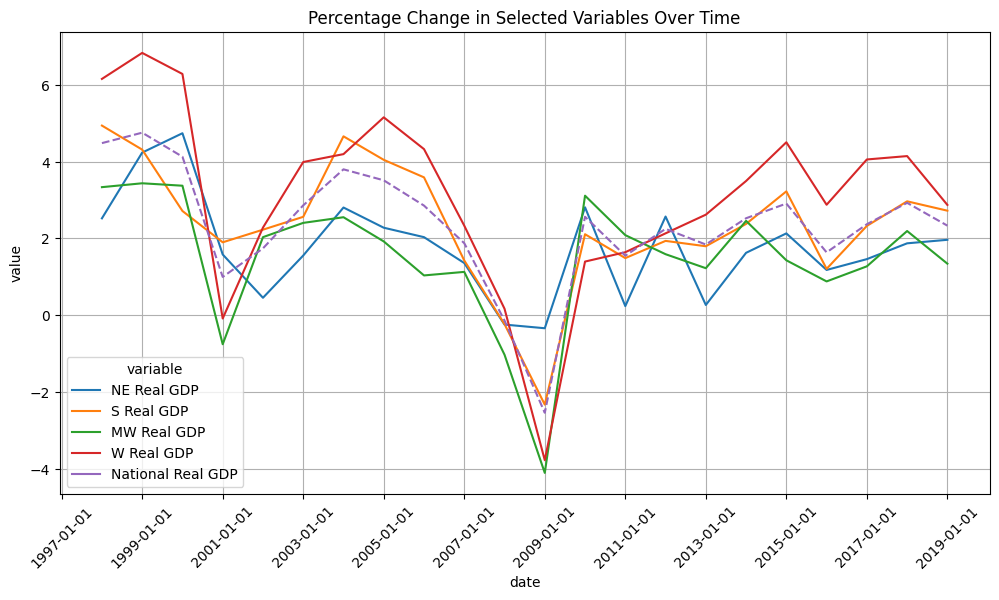

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = df.columns[5:10]

df_pct = df[cols].pct_change(periods=1)*100

df_pct['date'] = df['DATE']

df_long = df_pct.melt(id_vars=["date"], var_name="variable", value_name="value")

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df_long, x="date", y="value", hue="variable")

years = sorted(df['DATE'].unique())
plt.xticks(ticks=years[::2], labels=years[::2], rotation=45)

# National Real GDPを破線に変更
ax.lines[4].set_linestyle("--")

plt.title("Percentage Change in Selected Variables Over Time")
plt.grid(True)

plt.show()